Connected to offarm (Python 3.11.9)

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt


# Open theb netCDF file
dataset = nc.Dataset('https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2024090400.nc')


# Print dictionary contents vertically with formatting
print("------------------------------------------------")
for key, value in dataset.__dict__.items():
    print(f"{key:25}: {value}")


# Print the available variables
print("------------------------------------------------")
print("Available variables:")
for var in dataset.variables.keys():
    print(f"- {var}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
------------------------------------------------
file                     : /home/metno_op/run/norkyst-800m_2017/ocean_his.nc
type                     : ROMS/TOMS history file
var_info                 : /home/metno_op/sea/ROMS/metroms_apps/norkyst-800m_2017/include/varinfo.dat
rst_file                 : /home/metno_op/run/norkyst-800m_2017/ocean_rst.nc
his_file                 : /home/metno_op/run/norkyst-800m_2017/ocean_his.nc
avg_file                 : /home/metno_op/run/norkyst-800m_2017/ocea

In [11]:
print("\n" + "="*50)
print(" "*15 + "VARIABLE DIMENSIONS")
print("="*50)
for var_name, var in dataset.variables.items():
    print(f"{var_name:25}: {var.shape}")


               VARIABLE DIMENSIONS
Cs_r                     : (35,)
Cs_w                     : (36,)
X                        : (2602,)
Y                        : (902,)
depth                    : (16,)
forecast_reference_time  : ()
hc                       : ()
projection_stere         : ()
time                     : (24,)
AKs                      : (24, 16, 902, 2602)
Uwind                    : (24, 902, 2602)
Vwind                    : (24, 902, 2602)
angle                    : (902, 2602)
h                        : (902, 2602)
lat                      : (902, 2602)
lon                      : (902, 2602)
salinity                 : (24, 16, 902, 2602)
temperature              : (24, 16, 902, 2602)
tke                      : (24, 16, 902, 2602)
u                        : (24, 16, 902, 2602)
u_eastward               : (24, 16, 902, 2602)
ubar                     : (24, 902, 2602)
v                        : (24, 16, 902, 2602)
v_northward              : (24, 16, 902, 2602)
vbar        

In [16]:
# Extract the 'u' variable
u_probe = dataset.variables['u']

# Print the shape of the 'temp' variable
print("\n" + "-"*50)
print("u SHAPES :")
print(u_probe.shape)
print("-"*50)

print("available depths :")
print(np.array(dataset.variables['depth']))

print("\n available times :")
print(np.array(dataset.variables['time']))



--------------------------------------------------
u SHAPES :
(24, 16, 902, 2602)
--------------------------------------------------
available depths :
[   0.    3.   10.   15.   25.   50.   75.  100.  150.  200.  250.  300.
  500. 1000. 2000. 3000.]

 available times :
[1.7254080e+09 1.7254116e+09 1.7254152e+09 1.7254188e+09 1.7254224e+09
 1.7254260e+09 1.7254296e+09 1.7254332e+09 1.7254368e+09 1.7254404e+09
 1.7254440e+09 1.7254476e+09 1.7254512e+09 1.7254548e+09 1.7254584e+09
 1.7254620e+09 1.7254656e+09 1.7254692e+09 1.7254728e+09 1.7254764e+09
 1.7254800e+09 1.7254836e+09 1.7254872e+09 1.7254908e+09]


In [3]:
lat = dataset.variables['lat']
lon = dataset.variables['lon']

print(lat.shape)
print(lon.shape)

(902, 2602)
(902, 2602)


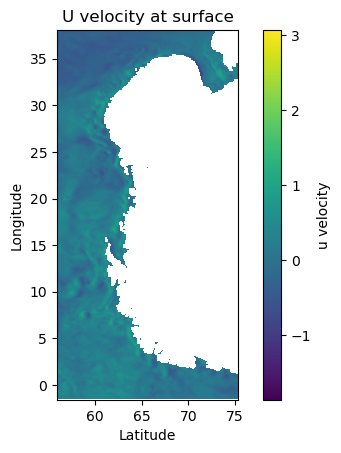

In [20]:
# Example u
u_data = u_probe[0, 0, :, :]
lat_data = np.array(lat[:])
lon_data = np.array(lon[:])

# Plot the data
plt.imshow(np.flip(np.flip(u_data.T, axis=0), axis=1),
            extent=[lat_data.min(), lat_data.max(), lon_data.min(), lon_data.max()], 
           cmap='viridis', origin='lower')
plt.colorbar(label='u velocity')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('U velocity at surface')
plt.show()

In [21]:
from scipy import stats

def fit_weibull(data):
    # Flatten and remove NaNs
    flat_data = data.flatten()
    flat_data = flat_data[~np.isnan(flat_data)]
    # Fit Weibull distribution
    params = stats.weibull_min.fit(flat_data)
    return params

